# 🏙️ Berlin Real Estate Price Analysis & Machine Learning Model

Welcome to my first complete end-to-end data science project!  
This notebook is inspired by the Kaggle *“House Prices: Advanced Regression Techniques”* competition, but instead of the Iowa dataset, I applied the workflow to the **Berlin housing market**.  
The dataset used in this project was also obtained from the **Kaggle website**.

The goal of this project is to:
- Explore real estate data from Berlin  
- Clean and prepare the dataset  
- Understand which features influence price  
- Build machine learning models to predict apartment prices  
- Practice a professional, reproducible ML pipeline  

This notebook includes:
1. Data loading and inspection  
2. Data cleaning (missing values, formatting)  
3. Exploratory data analysis  
4. Feature encoding  
5. Models training and evaluation  
6. Final conclusions  

Let’s get started!


## 📥 1. Loading the Dataset

In this section, we load the cleaned Berlin real-estate dataset.  
The dataset contains information about apartments and houses listed in Berlin, including:

- Price  
- Area (m²)  
- Rooms  
- District  
- Heating type  
- Energy type  
- Construction year  
- And other useful characteristics  

We begin by reading the CSV file and taking a first look at the structure.


In [3]:
# This is will be my first ever workfloww end to end project on Machine Learning..
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# First we Gather the data and we run to see the first few rows of the data
Data = pd.read_csv("./real_estate_listings_clean.csv")
Data.head()

,url,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
0,https://www.immowelt.de/expose/29fhx5b,Öl,Zentralheizung,249000.0,64.00,3.0,3.57,13505.0,1971.0,2.0,3890.625000
1,https://www.immowelt.de/expose/29hzk5u,Gas,"Fußbodenheizung, offener",1295000.0,136.06,4.0,3.57,10405.0,1900.0,5.0,9517.859768
2,https://www.immowelt.de/expose/292m95u,Gas,Etagenheizung,770000.0,120.00,4.0,3.57,12161.0,1900.0,5.0,6416.666667
3,https://www.immowelt.de/expose/29sh55u,Gas,Zentralheizung,349000.0,158.00,5.0,3.57,12103.0,1956.0,1.0,2208.860759
4,https://www.immowelt.de/expose/29r5y5t,Gas,Etagenheizung,494990.0,126.00,4.0,3.57,12157.0,1909.0,3.0,3928.492063


In [4]:
Data["energy"].unique()

array(['Öl', 'Gas', 'na', 'Fernwärme', 'Fernwärme, ', 'Elektro',
       'Elektro, ', 'Gas, ', 'Fußbodenheizung, ', 'Flüssiggas', 'Luft-/',
       'Blockheizkraftwerk, ', 'Holz, ', 'Erdwärme', 'Solar',
       'Niedrigenergiehaus', 'Pellets', 'Blockheizkraftwerk',
       'Erdwärme, ', 'Fußbodenheizung, offener '], dtype=object)

In [5]:
Data["heating"].unique()

array(['Zentralheizung', 'Fußbodenheizung, offener ', 'Etagenheizung',
       'na', 'Fußbodenheizung, ', 'Kamin, ', 'Fußbodenheizung',
       'Heizungsart', 'Wasser-', 'Kf', 'Luft-/', 'Kamin', 'Wärmepumpe',
       'Niedrigenergiehaus', 'Etagenheizung, ', 'Ofen, ',
       'Etagenheizung, offener ', 'Wärmepumpe, ', 'Fertighaus',
       'Wärmepumpe, offener ', 'Kohle, ', 'Heizungsartoffener ',
       'Minergie zertifiziert'], dtype=object)

## 📊 Basic Dataset Overview

Let’s take a closer look at the overall structure of the dataset:
- Number of rows and columns  
- Column names  
- Data types  
- Memory usage  

This allows us to identify:
- Which features are numerical or categorical  
- Potential missing values  
- Columns that may require cleaning or transformation


In [6]:
Data.duplicated().sum()

np.int64(0)

In [7]:

print("Shape:\n", Data.shape)
print("Columns:\n", Data.columns)

Shape:
 (4942, 11)
Columns:
 Index(['url', 'energy', 'heating', 'price', 'area', 'rooms', 'fee', 'zipcode',
       'construction_year', 'level', 'price_per_area'],
      dtype='object')


## 🧱 Data Types and Missing Information

The `.info()` summary is crucial in understanding the dataset:

- Numeric vs. categorical columns  
- Presence of null values  
- Data type problems (e.g., numeric stored as string)  
- Possible columns to drop or convert  

This step guides the cleaning phase of the workflow.


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4942 entries, 0 to 4941
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                4942 non-null   object 
 1   energy             4942 non-null   object 
 2   heating            4942 non-null   object 
 3   price              4942 non-null   float64
 4   area               4942 non-null   float64
 5   rooms              4942 non-null   float64
 6   fee                4942 non-null   float64
 7   zipcode            4942 non-null   float64
 8   construction_year  4942 non-null   float64
 9   level              4942 non-null   float64
 10  price_per_area     4942 non-null   float64
dtypes: float64(8), object(3)
memory usage: 424.8+ KB


## 🧹 2. Data Cleaning

In this section, we apply the following cleaning operations:
- Standardizing text values  
- Filling missing data where reasonable  
- Removing unnecessary columns  
- Converting data types  
- Ensuring all features follow the correct format

A clean dataset ensures better model performance and more reliable analysis.


In [9]:
Data.isna().sum() # Similar to Data.isnull().sum()

url                  0
energy               0
heating              0
price                0
area                 0
rooms                0
fee                  0
zipcode              0
construction_year    0
level                0
price_per_area       0
dtype: int64

In [10]:
Data=Data.drop("url", axis= 1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'fee'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'construction_year'}>],
       [<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'price_per_area'}>, <Axes: >]],
      dtype=object)

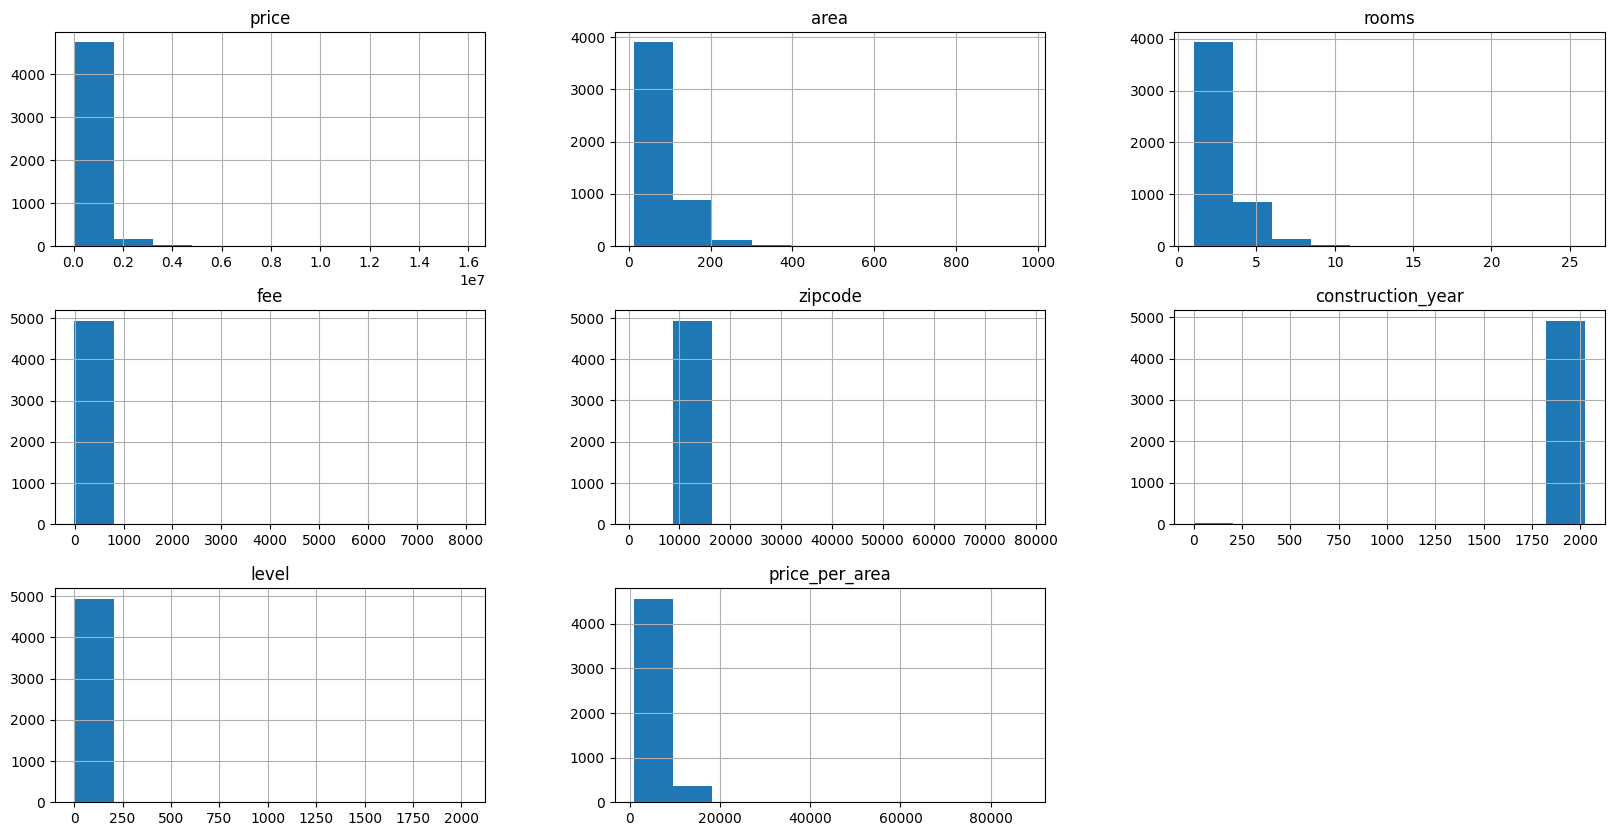

In [11]:
Data.hist(figsize=(20,10))

Machine learning models cannot directly interpret categorical text data.  
To make these variables usable, we transformed them into **numeric representations**.  

Examples of transformed features:
- Heating type  
- Energy class    

This ensures that the categorical information can be handled by the models during training.



In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
energy_cat=Data["energy"]
energy_cat_encoded=encoder.fit_transform(energy_cat)
energy_cat_encoded


array([19, 11, 11, ..., 11,  6, 19], shape=(4942,))

In [13]:
Data["energy"]=energy_cat_encoded
Data

,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
0,19,Zentralheizung,249000.0,64.00,3.0,3.57,13505.0,1971.0,2.0,3890.625000
1,11,"Fußbodenheizung, offener",1295000.0,136.06,4.0,3.57,10405.0,1900.0,5.0,9517.859768
2,11,Etagenheizung,770000.0,120.00,4.0,3.57,12161.0,1900.0,5.0,6416.666667
3,11,Zentralheizung,349000.0,158.00,5.0,3.57,12103.0,1956.0,1.0,2208.860759
4,11,Etagenheizung,494990.0,126.00,4.0,3.57,12157.0,1909.0,3.0,3928.492063
...,...,...,...,...,...,...,...,...,...,...
4937,6,"Fußbodenheizung,",429000.0,78.00,3.0,3.57,13595.0,2000.0,1.0,5500.000000
4938,11,Zentralheizung,729000.0,150.00,4.0,3.57,13467.0,1990.0,1.0,4860.000000
4939,11,Etagenheizung,695600.0,94.00,3.0,3.57,10115.0,1900.0,1.0,7400.000000
4940,6,Minergie zertifiziert,839251.0,107.00,3.0,3.57,13591.0,1894.0,1.0,7843.467290


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
heating_cat=Data["heating"]
heating_cat_encoded=encoder.fit_transform(heating_cat)
heating_cat_encoded

array([21,  6,  0, ...,  0, 14, 21], shape=(4942,))

In [15]:
Data["heating"]=heating_cat_encoded
Data

,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
0,19,21,249000.0,64.00,3.0,3.57,13505.0,1971.0,2.0,3890.625000
1,11,6,1295000.0,136.06,4.0,3.57,10405.0,1900.0,5.0,9517.859768
2,11,0,770000.0,120.00,4.0,3.57,12161.0,1900.0,5.0,6416.666667
3,11,21,349000.0,158.00,5.0,3.57,12103.0,1956.0,1.0,2208.860759
4,11,0,494990.0,126.00,4.0,3.57,12157.0,1909.0,3.0,3928.492063
...,...,...,...,...,...,...,...,...,...,...
4937,6,5,429000.0,78.00,3.0,3.57,13595.0,2000.0,1.0,5500.000000
4938,11,21,729000.0,150.00,4.0,3.57,13467.0,1990.0,1.0,4860.000000
4939,11,0,695600.0,94.00,3.0,3.57,10115.0,1900.0,1.0,7400.000000
4940,6,14,839251.0,107.00,3.0,3.57,13591.0,1894.0,1.0,7843.467290


<Axes: >

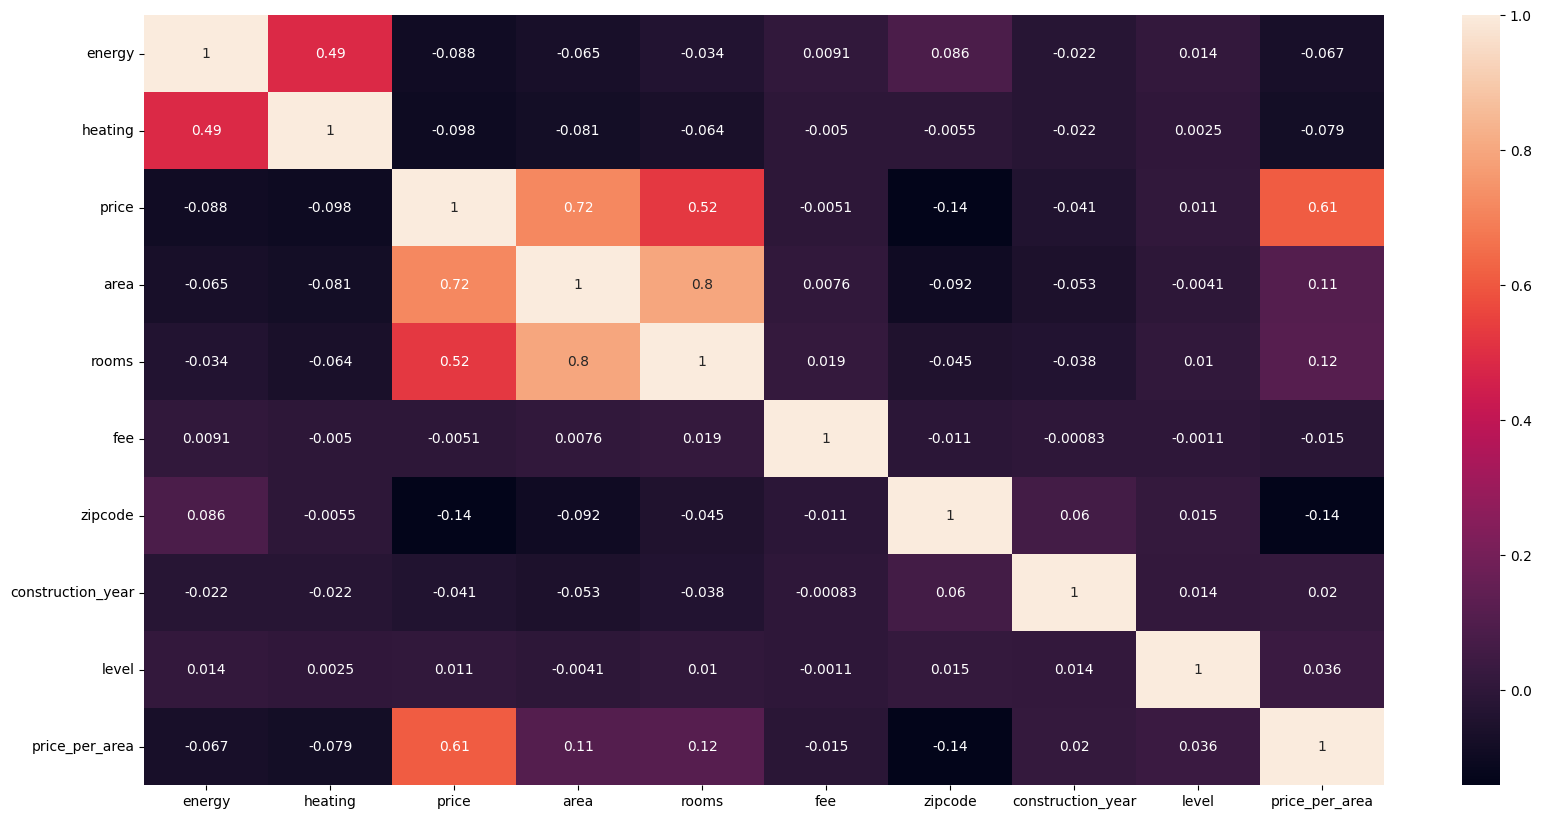

In [16]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(Data.corr(), annot= True)

## ✂️ 4. Train–Test Split

To evaluate the performance of our model, we split the dataset into:
- **Training set** — used to train the model  
- **Testing set** — used to measure how well the model generalizes  

This prevents overfitting and ensures the model is not simply memorizing the dataset.


In [17]:
from sklearn.model_selection import train_test_split
y=Data.price
X=Data.drop("price", axis=1)
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

## 🤖 5. Model Training

We begin by training an **XGBoost Regressor**, a powerful gradient boosting model that:
- Handles mixed numerical and categorical features efficiently  
- Captures complex non-linear relationships  
- Is robust against overfitting with proper regularization  
- Often achieves high predictive performance with careful parameter tuning  

This model is well-suited for predicting housing prices in the Berlin market.


In [18]:
from xgboost import XGBRegressor
my_model=XGBRegressor(n_estimators=500, learning_rate=0.08)
my_model.fit(X_train_full,y_train)
pred=my_model.predict(X_test_full)


## 📈 6. Model Evaluation

To understand how well the model performs, we evaluate predictions using:

- **MAE (Mean Absolute Error)** – average difference between predicted and actual price  
- **RMSE (Root Mean Squared Error)** – penalizes large errors   

These metrics help us understand whether the model can reliably predict real estate prices.


In [19]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
mae= mean_absolute_error(pred,y_test)
rmae= root_mean_squared_error(pred,y_test)
print("Mean absolut error:\n", mae)
print("Root mean absolut error:\n", rmae)

Mean absolut error:
 15704.123712398889
Root mean absolut error:
 134919.7756735359


# 🏁 Conclusions & Next Steps

This project demonstrates a machine learning workflow applied to Berlin real-estate data:

- Cleaned and prepared a real-world dataset  
- Explored price-related features  
- Encoded categorical variables  
- Trained a predictive Gradient boosting Regressor 
- Evaluated results using standard regression metrics  

## 🔮 Possible Improvements
- Hyperparameter tuning  
- Adding geospatial analysis (latitude/longitude)  
- Trying LightGBM  
- Creating a Streamlit app to estimate Berlin apartment prices  
- Adding more visualizations (price heatmaps, district comparisons)  

This was my first complete data science project — and a huge step toward building real machine-learning skills!
